## Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

##### Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
emp_survey=pd.read_csv('employee_survey_data.csv')

In [3]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4]:
emp_general_data=pd.read_csv('general_data.csv')

In [263]:
emp_general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [264]:
emp_general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [265]:
manager_survey=pd.read_csv('manager_survey_data.csv')

In [266]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [267]:
X=emp_general_data.copy()

In [268]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [269]:
X.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [270]:
X.dropna(inplace=True)

In [271]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        print(X[i].value_counts())
        print('\n')
    else:
        print(X[i].describe())
        print('\n')

count    4382.000000
mean       36.933364
std         9.137272
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


No     3677
Yes     705
Name: Attrition, dtype: int64


Travel_Rarely        3109
Travel_Frequently     825
Non-Travel            448
Name: BusinessTravel, dtype: int64


Research & Development    2865
Sales                     1330
Human Resources            187
Name: Department, dtype: int64


count    4382.000000
mean        9.198996
std         8.105396
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


count    4382.000000
mean        2.912369
std         1.024728
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64


Life Sciences       1806
Medical             1385
Marketing            475
Technical Degree     

In [272]:
#We will drop the variables whichhave only one value or are unique(Employee ID,Employee Count, Over18,Standard Hours)
X.drop(['EmployeeID','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [273]:
#Convert Attrition Yes to 1 and No to 0
X['Attrition']=X['Attrition'].map({'Yes':1,'No':0})

In [274]:
y=X['Attrition']
X=pd.get_dummies(X.drop('Attrition',axis=1),drop_first=True,prefix_sep='_')

In [275]:
X

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.0,6,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,...,0,0,0,0,0,1,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.0,2,...,0,0,0,0,0,0,1,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.0,5,...,1,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.0,2,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,4,3,2,35390,1.0,18,0,6.0,2,...,1,0,0,0,0,0,0,0,0,1
4405,42,5,4,1,60290,3.0,17,1,10.0,5,...,0,0,0,0,0,1,0,0,0,1
4406,29,2,4,1,26790,2.0,15,0,10.0,2,...,0,1,0,0,0,0,0,0,0,0
4407,25,25,2,2,37020,0.0,20,0,5.0,4,...,0,0,0,0,0,0,1,0,1,0


In [276]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)

In [278]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

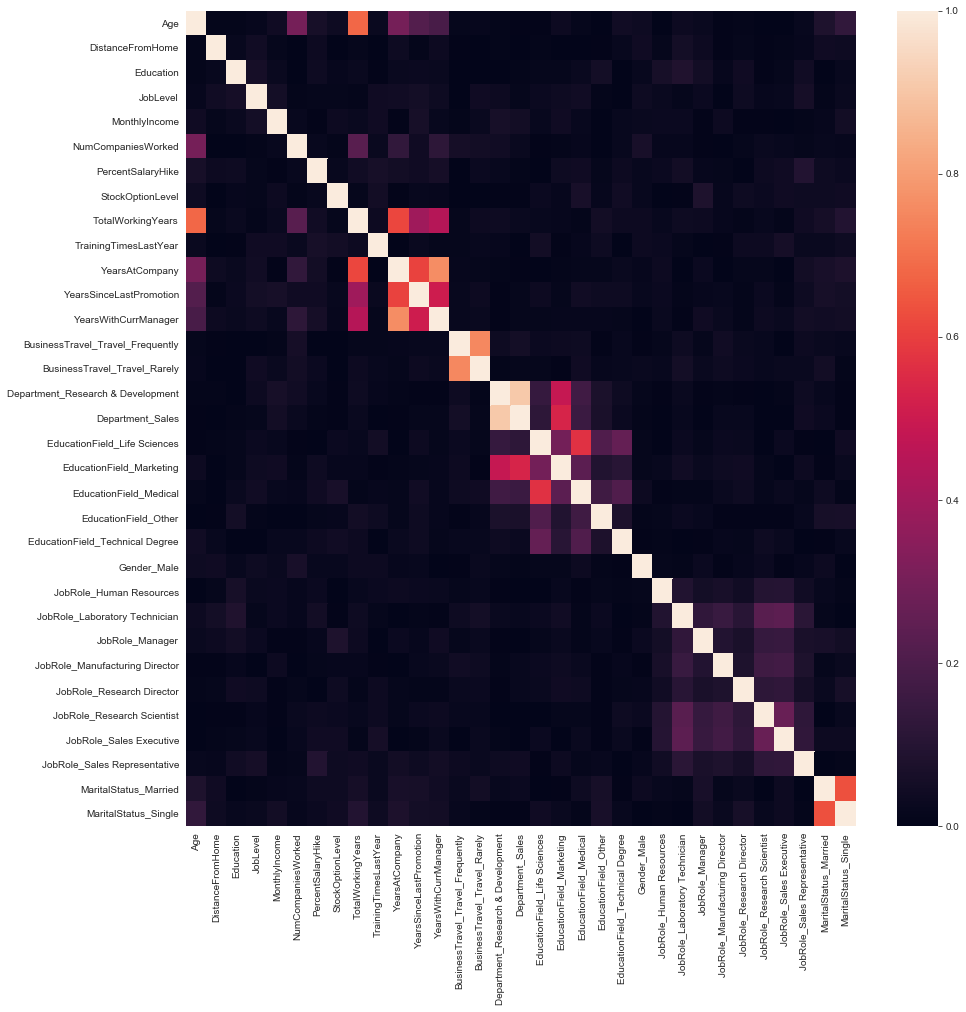

In [279]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(X_scaled.corr()))

In [280]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [281]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15).fit(X_scaled,y_train)

In [282]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True])

In [283]:
rfe.ranking_

array([ 1, 15,  1, 13, 14,  1,  2,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       11, 10,  9,  1,  8, 19, 18,  5, 17,  1,  3,  6,  4, 16, 12,  1])

In [284]:
list(zip(X_scaled.columns,rfe.support_,rfe.ranking_))

[('Age', True, 1),
 ('DistanceFromHome', False, 15),
 ('Education', True, 1),
 ('JobLevel', False, 13),
 ('MonthlyIncome', False, 14),
 ('NumCompaniesWorked', True, 1),
 ('PercentSalaryHike', False, 2),
 ('StockOptionLevel', False, 7),
 ('TotalWorkingYears', True, 1),
 ('TrainingTimesLastYear', True, 1),
 ('YearsAtCompany', True, 1),
 ('YearsSinceLastPromotion', True, 1),
 ('YearsWithCurrManager', True, 1),
 ('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', True, 1),
 ('Department_Research & Development', True, 1),
 ('Department_Sales', True, 1),
 ('EducationField_Life Sciences', False, 11),
 ('EducationField_Marketing', False, 10),
 ('EducationField_Medical', False, 9),
 ('EducationField_Other', True, 1),
 ('EducationField_Technical Degree', False, 8),
 ('Gender_Male', False, 19),
 ('JobRole_Human Resources', False, 18),
 ('JobRole_Laboratory Technician', False, 5),
 ('JobRole_Manager', False, 17),
 ('JobRole_Manufacturing Director', True, 1),
 ('JobRole

In [286]:
import statsmodels.api as sm

In [287]:
X_rfe=X_scaled.loc[:,rfe.support_]
sm_logreg=sm.GLM(list(y_train),(sm.add_constant(X_rfe)),family=sm.families.Binomial())
sm_logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3051
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1156.7
Date:                Sun, 31 May 2020   Deviance:                       2313.4
Time:                        06:16:18   Pearson chi2:                 3.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2327      0.362     -0.643      0.520      -0.942       0.476
Age                                  -1.6143      0.363     -4.446      0.000      -2.326      -0.903
Education                            -0.3676      0.207     -1.777      0.076      -0.773       0.038
NumCompaniesWorked                    1.2419      0.203      6.119      0.000       0.844       1.640
TotalWorkingYears                    -2.3772      0.604     -3.935      0.000      -3.561      -1.193
TrainingTimesLastYear                -0.7286      0.261     -2.796      0.005      -1.239      -0.218
YearsAtCompany                       -0.2569      0.958     -0.268      0.789      -2.135       1.621
YearsSinceLastPromotion               1.8877      0.381      4.957      0.000       1.141       2.634
YearsWithCurrManager                 -1.7342      0.476     -3.643      0.000      -2.667      -0.801
BusinessTravel_Travel_Frequently      1.3436      0.235      5.726      0.000       0.884       1.804
BusinessTravel_Travel_Rarely          0.5666      0.219      2.591      0.010       0.138       0.995
Department_Research & Development    -0.8859      0.222     -3.991      0.000      -1.321      -0.451
Department_Sales                     -1.0750      0.234     -4.586      0.000      -1.534      -0.616
EducationField_Other                 -0.3858      0.259     -1.487      0.137      -0.894       0.123
JobRole_Manufacturing Director       -0.6027      0.203     -2.973      0.003      -1.000      -0.205
MaritalStatus_Single                  0.8340      0.108      7.695      0.000       0.622       1.046
=====================================================================================================
"""

In [288]:
X_rfe.drop('YearsAtCompany',axis=1,inplace=True)
sm_logreg=sm.GLM(list(y_train),(sm.add_constant(X_rfe)),family=sm.families.Binomial())
sm_logreg.fit().summary()

/Users/shekheee/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3052
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1156.8
Date:                Sun, 31 May 2020   Deviance:                       2313.5
Time:                        06:16:19   Pearson chi2:                 3.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2400      0.361     -0.665      0.506      -0.947       0.467
Age                                  -1.6036      0.361     -4.443      0.000      -2.311      -0.896
Education                            -0.3665      0.207     -1.771      0.076      -0.772       0.039
NumCompaniesWorked                    1.2530      0.199      6.307      0.000       0.864       1.642
TotalWorkingYears                    -2.4482      0.546     -4.485      0.000      -3.518      -1.378
TrainingTimesLastYear                -0.7282      0.261     -2.795      0.005      -1.239      -0.218
YearsSinceLastPromotion               1.8423      0.340      5.412      0.000       1.175       2.509
YearsWithCurrManager                 -1.8096      0.383     -4.726      0.000      -2.560      -1.059
BusinessTravel_Travel_Frequently      1.3429      0.235      5.723      0.000       0.883       1.803
BusinessTravel_Travel_Rarely          0.5665      0.219      2.591      0.010       0.138       0.995
Department_Research & Development    -0.8866      0.222     -3.993      0.000      -1.322      -0.451
Department_Sales                     -1.0763      0.234     -4.591      0.000      -1.536      -0.617
EducationField_Other                 -0.3883      0.259     -1.498      0.134      -0.896       0.120
JobRole_Manufacturing Director       -0.6035      0.203     -2.977      0.003      -1.001      -0.206
MaritalStatus_Single                  0.8356      0.108      7.722      0.000       0.624       1.048
=====================================================================================================
"""

In [289]:
X_rfe.drop('EducationField_Other',axis=1,inplace=True)
sm_logreg=sm.GLM(list(y_train),(sm.add_constant(X_rfe)),family=sm.families.Binomial())
sm_logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3053
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1158.0
Date:                Sun, 31 May 2020   Deviance:                       2315.9
Time:                        06:16:20   Pearson chi2:                 3.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2729      0.360     -0.758      0.449      -0.979       0.433
Age                                  -1.6155      0.360     -4.489      0.000      -2.321      -0.910
Education                            -0.3839      0.206     -1.859      0.063      -0.789       0.021
NumCompaniesWorked                    1.2505      0.198      6.302      0.000       0.862       1.639
TotalWorkingYears                    -2.4128      0.544     -4.438      0.000      -3.478      -1.347
TrainingTimesLastYear                -0.7091      0.260     -2.726      0.006      -1.219      -0.199
YearsSinceLastPromotion               1.8623      0.340      5.475      0.000       1.196       2.529
YearsWithCurrManager                 -1.8231      0.382     -4.774      0.000      -2.572      -1.075
BusinessTravel_Travel_Frequently      1.3519      0.235      5.759      0.000       0.892       1.812
BusinessTravel_Travel_Rarely          0.5792      0.219      2.648      0.008       0.151       1.008
Department_Research & Development    -0.8956      0.222     -4.038      0.000      -1.330      -0.461
Department_Sales                     -1.0748      0.234     -4.588      0.000      -1.534      -0.616
JobRole_Manufacturing Director       -0.6144      0.203     -3.032      0.002      -1.012      -0.217
MaritalStatus_Single                  0.8487      0.108      7.869      0.000       0.637       1.060
=====================================================================================================
"""

In [290]:
X_rfe.drop('Education',axis=1,inplace=True)
sm_logreg=sm.GLM(list(y_train),(sm.add_constant(X_rfe)),family=sm.families.Binomial())
sm_logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3054
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.7
Date:                Sun, 31 May 2020   Deviance:                       2319.4
Time:                        06:16:20   Pearson chi2:                 3.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4704      0.343     -1.370      0.171      -1.144       0.203
Age                                  -1.5748      0.358     -4.400      0.000      -2.276      -0.873
NumCompaniesWorked                    1.2432      0.198      6.274      0.000       0.855       1.632
TotalWorkingYears                    -2.4617      0.545     -4.518      0.000      -3.530      -1.394
TrainingTimesLastYear                -0.7201      0.260     -2.769      0.006      -1.230      -0.210
YearsSinceLastPromotion               1.8508      0.340      5.438      0.000       1.184       2.518
YearsWithCurrManager                 -1.8301      0.382     -4.791      0.000      -2.579      -1.082
BusinessTravel_Travel_Frequently      1.3572      0.235      5.778      0.000       0.897       1.818
BusinessTravel_Travel_Rarely          0.5873      0.219      2.685      0.007       0.159       1.016
Department_Research & Development    -0.8801      0.221     -3.981      0.000      -1.313      -0.447
Department_Sales                     -1.0614      0.234     -4.544      0.000      -1.519      -0.604
JobRole_Manufacturing Director       -0.6083      0.202     -3.008      0.003      -1.005      -0.212
MaritalStatus_Single                  0.8464      0.108      7.858      0.000       0.635       1.058
=====================================================================================================
"""

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [292]:
vif=pd.DataFrame()
vif['Features']=X_rfe.columns
vif['VIF']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF',ascending=False)
# variance_inflation_factor(X_rfe[''],)

,Features,VIF
0,Age,9.81
8,Department_Research & Development,8.45
2,TotalWorkingYears,7.61
7,BusinessTravel_Travel_Rarely,6.19
3,TrainingTimesLastYear,5.28
9,Department_Sales,4.53
5,YearsWithCurrManager,3.66
1,NumCompaniesWorked,2.50
6,BusinessTravel_Travel_Frequently,2.41
4,YearsSinceLastPromotion,2.09


In [293]:
X_rfe.drop('Age',axis=1,inplace=True)
sm_logreg=sm.GLM(list(y_train),(sm.add_constant(X_rfe)),family=sm.families.Binomial())
sm_logreg.fit().summary()

/Users/shekheee/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3055
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1170.0
Date:                Sun, 31 May 2020   Deviance:                       2340.0
Time:                        06:16:22   Pearson chi2:                 3.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8419      0.332     -2.535      0.011      -1.493      -0.191
NumCompaniesWorked                    1.0733      0.194      5.524      0.000       0.692       1.454
TotalWorkingYears                    -3.7608      0.461     -8.160      0.000      -4.664      -2.858
TrainingTimesLastYear                -0.6919      0.257     -2.690      0.007      -1.196      -0.188
YearsSinceLastPromotion               1.8268      0.342      5.348      0.000       1.157       2.496
YearsWithCurrManager                 -1.6446      0.382     -4.308      0.000      -2.393      -0.896
BusinessTravel_Travel_Frequently      1.3380      0.234      5.719      0.000       0.879       1.797
BusinessTravel_Travel_Rarely          0.5911      0.218      2.712      0.007       0.164       1.018
Department_Research & Development    -0.8397      0.220     -3.819      0.000      -1.271      -0.409
Department_Sales                     -1.0456      0.233     -4.493      0.000      -1.502      -0.590
JobRole_Manufacturing Director       -0.6181      0.202     -3.067      0.002      -1.013      -0.223
MaritalStatus_Single                  0.8908      0.107      8.346      0.000       0.682       1.100
=====================================================================================================
"""

In [294]:
vif=pd.DataFrame()
vif['Features']=X_rfe.columns
vif['VIF']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF',ascending=False)


,Features,VIF
7,Department_Research & Development,8.00
6,BusinessTravel_Travel_Rarely,6.12
2,TrainingTimesLastYear,5.23
1,TotalWorkingYears,4.58
8,Department_Sales,4.30
4,YearsWithCurrManager,3.63
0,NumCompaniesWorked,2.41
5,BusinessTravel_Travel_Frequently,2.39
3,YearsSinceLastPromotion,2.09
10,MaritalStatus_Single,1.46


In [295]:
X_rfe.drop('Department_Research & Development',axis=1,inplace=True)
sm_logreg=sm.GLM(list(y_train),(sm.add_constant(X_rfe)),family=sm.families.Binomial())
sm_logreg=sm_logreg.fit()
sm_logreg.summary()

/Users/shekheee/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3056
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.7
Date:                Sun, 31 May 2020   Deviance:                       2353.5
Time:                        06:16:23   Pearson chi2:                 3.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.5987      0.267     -5.995      0.000      -2.121      -1.076
NumCompaniesWorked                   1.0166      0.193      5.272      0.000       0.639       1.395
TotalWorkingYears                   -3.7335      0.460     -8.119      0.000      -4.635      -2.832
TrainingTimesLastYear               -0.7219      0.256     -2.823      0.005      -1.223      -0.221
YearsSinceLastPromotion              1.8362      0.341      5.391      0.000       1.169       2.504
YearsWithCurrManager                -1.7025      0.380     -4.478      0.000      -2.448      -0.957
BusinessTravel_Travel_Frequently     1.3283      0.233      5.708      0.000       0.872       1.784
BusinessTravel_Travel_Rarely         0.6104      0.217      2.817      0.005       0.186       1.035
Department_Sales                    -0.2696      0.118     -2.294      0.022      -0.500      -0.039
JobRole_Manufacturing Director      -0.5952      0.201     -2.963      0.003      -0.989      -0.201
MaritalStatus_Single                 0.9007      0.106      8.465      0.000       0.692       1.109
====================================================================================================
"""

In [296]:
vif=pd.DataFrame()
vif['Features']=X_rfe.columns
vif['VIF']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF',ascending=False)


,Features,VIF
1,TotalWorkingYears,4.53
6,BusinessTravel_Travel_Rarely,4.44
2,TrainingTimesLastYear,4.19
4,YearsWithCurrManager,3.52
0,NumCompaniesWorked,2.31
3,YearsSinceLastPromotion,2.09
5,BusinessTravel_Travel_Frequently,1.91
9,MaritalStatus_Single,1.44
7,Department_Sales,1.42
8,JobRole_Manufacturing Director,1.11


In [297]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [298]:
y_train_predict=sm_logreg.predict(sm.add_constant(X_rfe))

In [299]:
attrition=pd.DataFrame({'Attrition':y_train.values,'Predicted':y_train_predict})

In [301]:
attrition['Attrition_pred']=attrition['Predicted'].apply(lambda x:1 if x>0.5 else 0)

In [304]:
attrition

,Attrition,Predicted,Attrition_pred
0,1,0.428892,0
1,1,0.229827,0
2,1,0.454637,0
3,0,0.255044,0
4,1,0.091733,0
...,...,...,...
3062,0,0.064884,0
3063,0,0.132164,0
3064,1,0.151430,0
3065,0,0.106480,0


In [305]:
confusion=confusion_matrix(attrition.Attrition,attrition.Attrition_pred)

In [306]:
confusion

array([[2583,    4],
       [ 447,   33]])

In [316]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in range(11):
    attrition['Attrition_pred']=attrition['Predicted'].apply(lambda x:1 if x>(i/10) else 0)
    cm1=confusion_matrix(attrition.Attrition,attrition.Attrition_pred)
    cr=classification_report(attrition.Attrition,attrition.Attrition_pred)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

    prob  accuracy     sensi     speci
0    0.0  0.156505  1.000000  0.000000
1    1.0  0.502771  0.862500  0.436026
2    2.0  0.727747  0.572917  0.756475
3    3.0  0.823280  0.354167  0.910321
4    4.0  0.847408  0.175000  0.972169
5    5.0  0.852951  0.068750  0.998454
6    6.0  0.845452  0.018750  0.998840
7    7.0  0.844147  0.004167  1.000000
8    8.0  0.843495  0.000000  1.000000
9    9.0  0.843495  0.000000  1.000000
10  10.0  0.843495  0.000000  1.000000


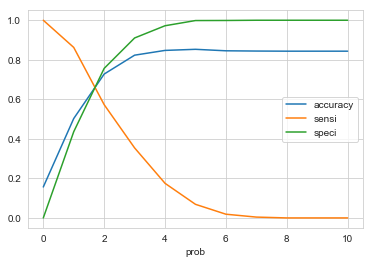

In [317]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [310]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

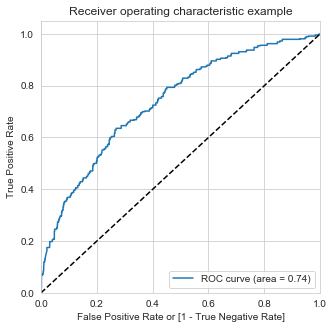

In [314]:
draw_roc(attrition.Attrition,attrition.Predicted)

In [312]:
from sklearn import metrics